In [53]:
%load_ext autoreload
%autoreload 2

import numpy as np

%matplotlib widget

import matplotlib

import matplotlib.pyplot as plt
import sanpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  version: 0.0.4
  reduceFraction: 0
  lineWidth: 1
  imageFilterKenel: 0
  lineFilterKernel: 5
  detectPosNeg: pos
  percentOfMax: 0.30000000000000004
  lRoi: 0
  tRoi: 293
  rRoi: 1000
  bRoi: 22
  umPerPixel: 0.414
  secondsPerLine: 0.004505
  bitDepth: 16
  dtype: <class 'str'>
  interpMult: 0
  finalDiamFilterKernel: 3


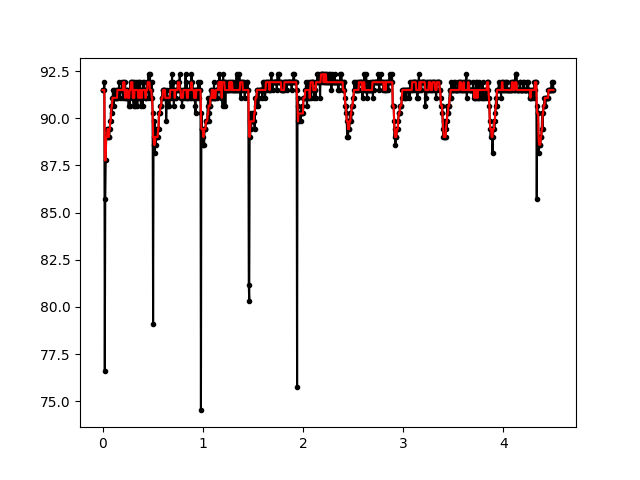

In [54]:
# remember, need to load channel 2 to also load analysis (_C002T001)
path='/media/cudmore/data/Dropbox/data/cell-shortening/Low resolution files_kymographs analysis/cell02_0002.tif.frames/cell02_0002_C002T001.tif'
# path='/Users/cudmore/Dropbox/data/cell-shortening/Low resolution files_kymographs analysis/cell02_0002.tif.frames/cell02_0002_C002T001.tif'

ba = sanpy.bAnalysis(path, verbose=False)

ba.kymAnalysis.printAnlysisParam()

time_sec = ba.kymAnalysis.getResults("time_sec")
diameter_um = ba.kymAnalysis.getResults("diameter_um")
diameter_pnts = ba.kymAnalysis.getResults("diameter_pnts")

# diameter_um_filt has hard coded median filter of 5
diameter_um_filt = ba.kymAnalysis.getResults("diameter_um_filt")

fig, ax1 = plt.subplots()
ax1.plot(time_sec, diameter_um, 'k.-');
ax1.plot(time_sec, diameter_um_filt, 'r');

## Reanalyze with analyzeDiameter lineWidth of 3 (all previous were 1)

For interp1d, see:
https://stackoverflow.com/questions/65091821/how-to-do-a-interpolation-by-using-thresholds-with-python

In [92]:
ba.kymAnalysis.setAnalysisParam('lineWidth', 1)
ba.kymAnalysis.setAnalysisParam('imageFilterKenel', 0)
ba.kymAnalysis.setAnalysisParam('lineFilterKernel', 0)
ba.kymAnalysis.setAnalysisParam('interpMult', 0)

_profile, _left, _right = ba.kymAnalysis._getFitLineProfile(0)
print(_profile.shape)

ba.kymAnalysis.printAnlysisParam()

ba.kymAnalysis.analyzeDiameter(verbose=False)
diameter_um0 = ba.kymAnalysis.getResults("diameter_um")
diameter_um0_filt = ba.kymAnalysis.getResults("diameter_um_filt")

lineWidth = 8
ba.kymAnalysis.setAnalysisParam('interpMult', 4)
ba.kymAnalysis.setAnalysisParam('lineWidth', lineWidth)
ba.kymAnalysis.analyzeDiameter(verbose=False)
diameter_um7 = ba.kymAnalysis.getResults("diameter_um")
diameter_um7_filt = ba.kymAnalysis.getResults("diameter_um_filt")

_profile, _left, _right = ba.kymAnalysis._getFitLineProfile(0)
print(_profile.shape)


(339,)
  version: 0.0.4
  reduceFraction: 0
  lineWidth: 1
  imageFilterKenel: 0
  lineFilterKernel: 0
  detectPosNeg: pos
  percentOfMax: 0.30000000000000004
  lRoi: 0
  tRoi: 293
  rRoi: 1000
  bRoi: 22
  umPerPixel: 0.414
  secondsPerLine: 0.004505
  bitDepth: 16
  dtype: <class 'str'>
  interpMult: 0
  finalDiamFilterKernel: 3
(339,)


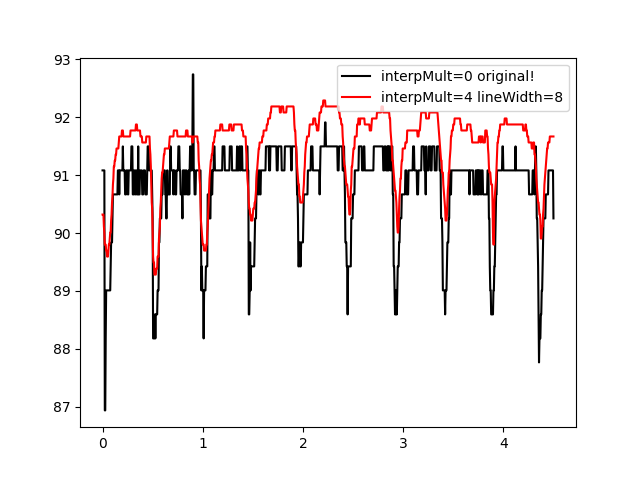

In [93]:
fig, ax1 = plt.subplots()

ax1.plot(time_sec, diameter_um0_filt, 'k-', label='interpMult=0 original!');
ax1.plot(time_sec, diameter_um7_filt, 'r-', label=f'interpMult=4 lineWidth=8');
plt.legend(loc="upper right")